## Introduction. 

### Write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples?




1. Использовтаь методы мл для предсказания свойств молекул при выборе кандиатов в драг дизайне

    Польза: помогает зараннее выбрать наиболее подходящие молекулы->уменьшить время и денежные траты на тестирвоание реальных кейсов лекарств

2. Использование мл в составление прогнозов здоровья на основе данных о человеке и его тренировках
    Польза: сможешь вычислить сроки выполнения поставленных целей по весу и состоянию тела и организма, тем самым предотвращая болезни ( например ожирение или анорексию и создавая боле ездоровую и качествееную версию своего организма)

3. Использовать мл для предсказаний потребительского интереса для маркет плейсов
    Польза: повышение продаж и укрепление положительного авторитет у покупателей-> увелечение пользователей и оборотов 

4. Использовать мл как предсказаний точек нефти и газа добычи 
    Польза: уменшать затраты на реальные поиски и повышение эффективности добычи полезных ископаемых

5. Использовать мл для рапознования лиц 
    Польза: повышение безопансости 
    

### Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided.

1. Predict house price = Regression 
2. Predict whether a client returns a loan = 2.1 Classificatiob( yes or no) 
                                             2.2 Regression
3. Predict when a patient needs to take medicine = Classification
4. Choose what medicine out of available a patient should take = Classification
5. Choose segment of clients for a promo communication = Classification/ Clustering
6. Recognition of defective products on the production line (based on photo scans) =  Classification
7. Decide how to place products on a shelf in a store = Regression 
8. Search sites for input text query = Regression or  Classification( success or not)
9. 	Split customers of a store into segments to understand differences of their behavior = Clustering 
10. Detect anomaly in site traffic = Classification( anomaly or not) or Association
11. Toxic or nor toxic molecul = Classification
12. Health aim predicting = Regression
13. Predict consumer interest for marketplaces = Regression
14. Predict locations for oil and gas extraction = Regression 
15. Face recognition = Classification


### Think about what the difference is between multiclass and multilabel.

Multiclacc :  у одного объекта есть вариативность классов то есть объект принадлиж одному из множества классов 
    Пример: обьект одежда классы = юбка, штаны, футболка и тд
Multilabels : одни обьект может одновремеенно принадлежать нескольким классам
    Пример : объект фильм может быть боевик комедия, драма триллер и тд 

### Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?

Да в теории мы рассмотрели это задачу как регрессию, так как предсказываемый таргет евлялся величиной непрерывной, однако мы можем разбить ценовой диапазон и сдлеать следующие метки : дорогой, средний, дешевый в зависимости от попадания цены в соответствующий разделениям интервал и сделать новую колонкку таргета. И по не определять принадлежность к классу т.е получили задачу классификации 

## Imports

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import scipy as sp
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


## Load data


In [2]:
df_full=pd.read_json('data/train.json')
df_full['created']= pd.to_datetime(df_full['created'])
df_full.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [3]:
df_full.columns.to_list()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

The target is ['price']

In [4]:
df_full.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bathrooms        49352 non-null  float64       
 1   bedrooms         49352 non-null  int64         
 2   building_id      49352 non-null  object        
 3   created          49352 non-null  datetime64[ns]
 4   description      49352 non-null  object        
 5   display_address  49352 non-null  object        
 6   features         49352 non-null  object        
 7   latitude         49352 non-null  float64       
 8   listing_id       49352 non-null  int64         
 9   longitude        49352 non-null  float64       
 10  manager_id       49352 non-null  object        
 11  photos           49352 non-null  object        
 12  price            49352 non-null  int64         
 13  street_address   49352 non-null  object        
 14  interest_level   49352 non-null  object   

In [5]:
df_full.describe()

,bathrooms,bedrooms,created,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,2016-05-16 05:15:32.546178560,40.741545,7.024055e+06,-73.955716,3.830174e+03
min,0.00000,0.000000,2016-04-01 22:12:41,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,2016-04-23 02:10:23,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,2016-05-16 03:09:36.500000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,2016-06-08 05:52:06.249999872,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,2016-06-29 21:41:47,44.883500,7.753784e+06,0.000000,4.490000e+06
std,0.50142,1.115018,NaN,0.638535,1.262746e+05,1.177912,2.206687e+04


In [6]:
numeric_df=df_full.select_dtypes(include=['number'])
numeric_df.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


Check the portion if null objects in df

In [7]:
df_full.isnull().sum()
df_full.isnull().mean()

bathrooms          0.0
bedrooms           0.0
building_id        0.0
created            0.0
description        0.0
display_address    0.0
features           0.0
latitude           0.0
listing_id         0.0
longitude          0.0
manager_id         0.0
photos             0.0
price              0.0
street_address     0.0
interest_level     0.0
dtype: float64

In [8]:
#df_full.describe(include='object')

### Explanation of the outputs
Всего 49 352 строки 
есть разные типы данных : datetime-1,  int64-3, float64-3, object-8

Фактических пустых строк нет, но есть пустые списки ?

Корелляция между отдельными признаками и ценой слабая-> не линейная зависимость ?


In [9]:
df=df_full[['bathrooms', 'bedrooms', 'interest_level', 'price']].reset_index(drop=True)
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       49352 non-null  float64
 1   bedrooms        49352 non-null  int64  
 2   interest_level  49352 non-null  object 
 3   price           49352 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


### Target Analysis

In [10]:
df['price'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.99])

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
10%      2.000000e+03
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
99%      1.300000e+04
max      4.490000e+06
Name: price, dtype: float64

In [11]:
#df['price'].isnull().sum()
#(df['price']==0).sum()
(df['price']<0).sum()

np.int64(0)

In [12]:
skew=df['price'].skew()
kurt=df['price'].kurtosis()
print(f"Skewness is {skew:.5f}\nKartosis is {kurt:.5f}")

Skewness is 177.69400
Kartosis is 34983.03852


In [13]:
mediana=df['price'].median()
q1=df['price'].quantile(q=0.25)
q3=df['price'].quantile(q=0.75)
iqr=q3-q1
print(f'Mediana is {mediana}\nIQR is {iqr}')

Mediana is 3150.0
IQR is 1600.0


*для подсчета количсевта бинов применим правила Фридмана-Диакониса( классс Стерджисса не подходит)

In [14]:
h=(2*iqr)/(len(df['price'])**(1/3))
k=int(round((df['price'].max()-df['price'].min())/ h ,0)+1)
print(f'h is {h}\namount of bins is {k}')

h is 87.23987994253766
amount of bins is 51468


#### Histogramm

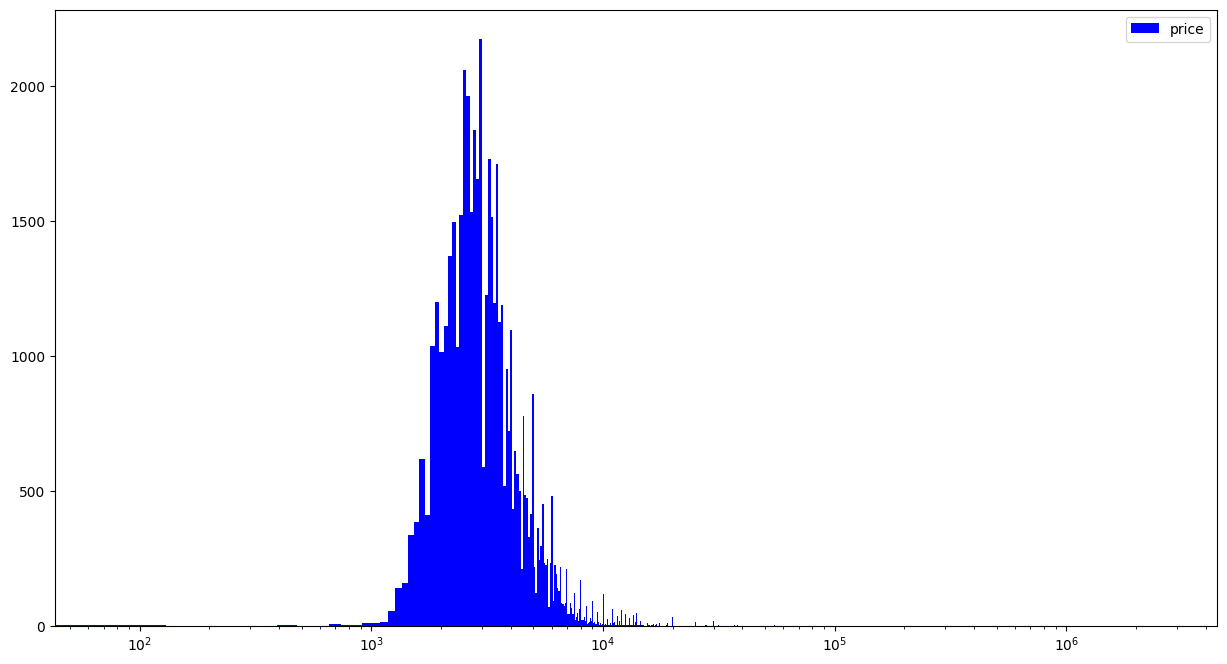

In [15]:
fig, ax=plt.subplots(figsize=(15,8))
ax.hist(
    df['price'].tolist(),
    bins=k,
    color='blue',
    label='price'
)
ax.set_xscale('log')
ax.set_xlim(df['price'].min(), df['price'].max())
ax.legend(loc='best')



Краткий отчет по гистограмме:
1. Данные сильно скошены вправо ( по skew и по графику->много слишком высоких цен, экстремально высоких)
2. Есть несколько относительно больших пиков может быть это разные ценовые сигменты


#### Boxplot

Text(0.5, 1.0, 'Boxplot of price label')

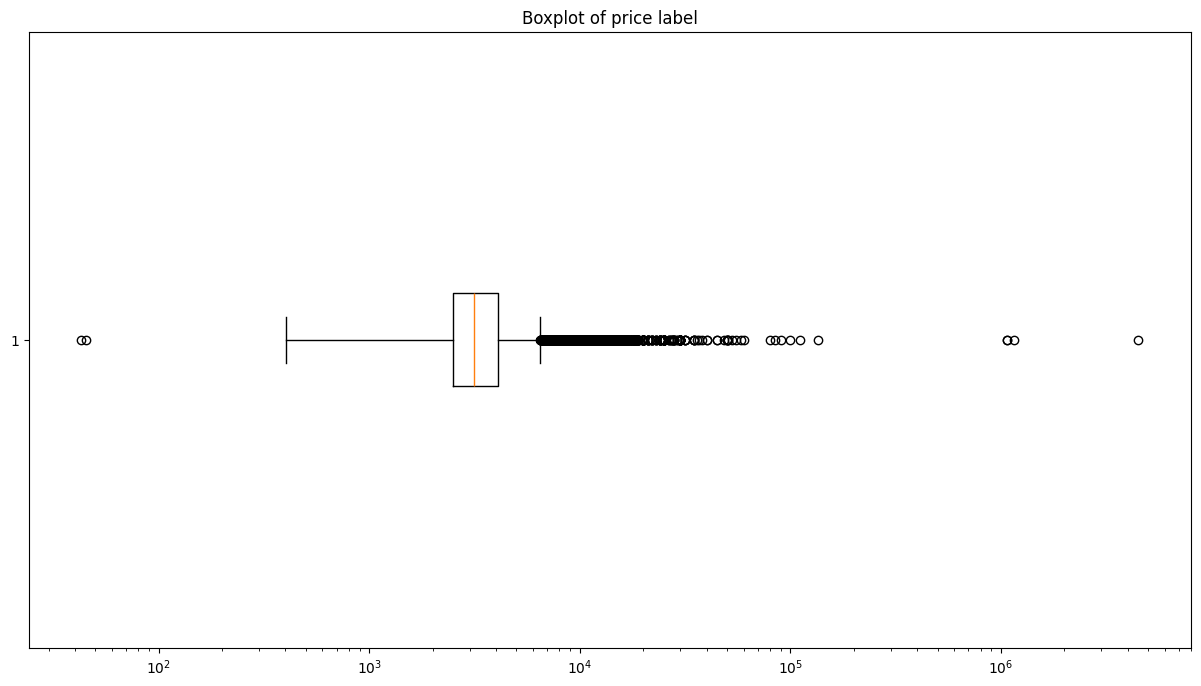

In [16]:
plt.figure(figsize=(15,8))
plt.boxplot(df['price'], vert=False)
plt.xscale('log')
plt.title('Boxplot of price label')

Да есть выбросы особенно со скосом в правый конец, подтвреждает данные выше 


In [17]:
df_copy=df.copy()
q_1=df['price'].quantile(q=0.01)
q_99=df['price'].quantile(q=0.99)
df_filtered = df[(df['price'] > q_1) & (df['price'] < q_99)].reset_index(drop=True)
df=df_filtered
df


,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795
...,...,...,...,...
48338,1.0,3,low,2800
48339,1.0,2,medium,2395
48340,1.0,1,medium,1850
48341,1.0,2,medium,4195


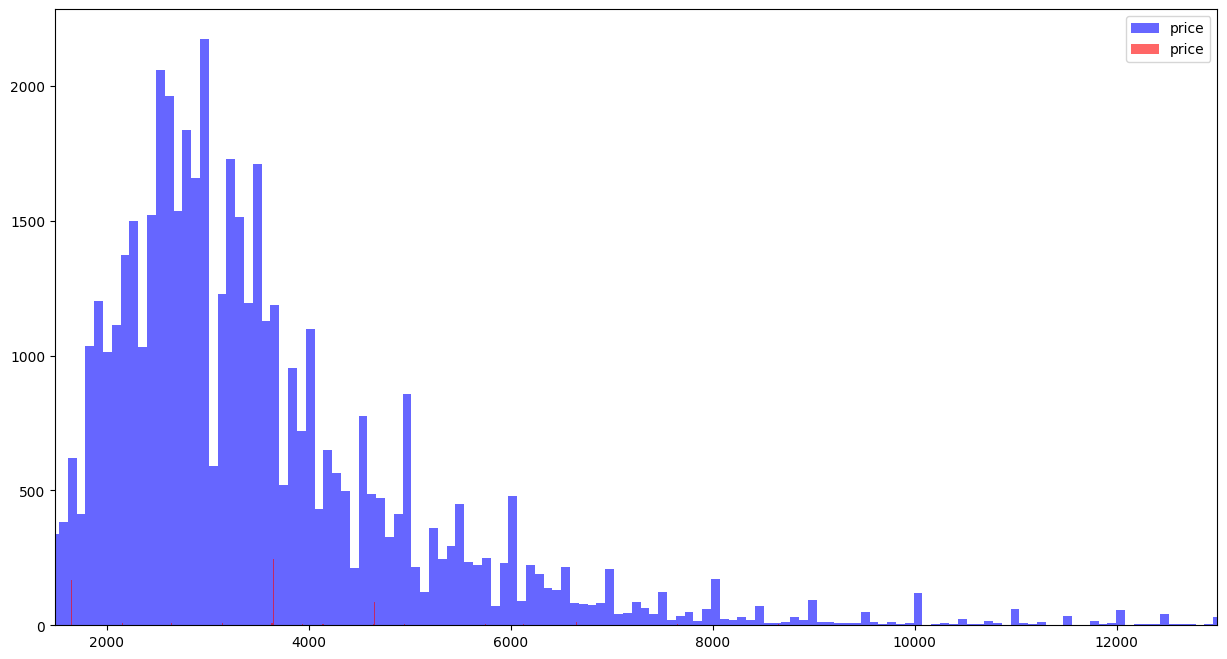

In [18]:
fig, ax=plt.subplots(figsize=(15,8))
ax.hist(
    df_copy['price'].tolist(),
    bins=k,
    color='blue',
    label='price',
    alpha=0.6
)
ax.hist(
    df['price'].tolist(),
    bins=k,
    color='red',
    label='price',
    alpha=0.6
    )

#ax.set_xscale('log')
ax.set_xlim(df['price'].min(), df['price'].max())
ax.legend(loc='best')

(array([4.9348e+04, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.3000000e+01, 4.4903870e+05, 8.9803440e+05, 1.3470301e+06,
        1.7960258e+06, 2.2450215e+06, 2.6940172e+06, 3.1430129e+06,
        3.5920086e+06, 4.0410043e+06, 4.4900000e+06]),
 <BarContainer object of 10 artists>)

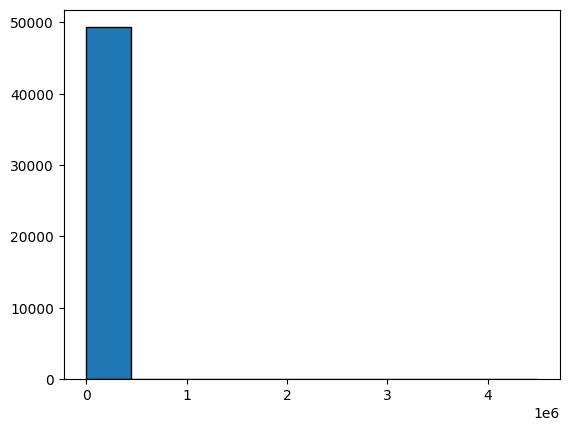

In [19]:
plt.hist(df_copy['price'], edgecolor='black')

(array([2672., 5141., 7092., 7781., 6092., 4643., 3370., 2552., 1736.,
        1713., 1287., 1042.,  684.,  550.,  406.,  290.,  326.,   86.,
         116.,  148.,   88.,   30.,  139.,   34.,   89.,   29.,   54.,
          75.,   58.,   20.]),
 array([ 1485.        ,  1868.66666667,  2252.33333333,  2636.        ,
         3019.66666667,  3403.33333333,  3787.        ,  4170.66666667,
         4554.33333333,  4938.        ,  5321.66666667,  5705.33333333,
         6089.        ,  6472.66666667,  6856.33333333,  7240.        ,
         7623.66666667,  8007.33333333,  8391.        ,  8774.66666667,
         9158.33333333,  9542.        ,  9925.66666667, 10309.33333333,
        10693.        , 11076.66666667, 11460.33333333, 11844.        ,
        12227.66666667, 12611.33333333, 12995.        ]),
 <BarContainer object of 30 artists>)

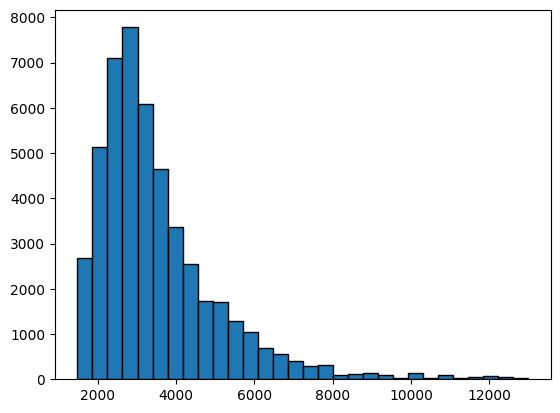

In [20]:
plt.hist(df['price'], bins=30,edgecolor='black')

### Characteristic Analysis

In [21]:
df['interest_level'].dtype

dtype('O')

In [22]:
df['interest_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48343 entries, 0 to 48342
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48343 non-null  object
dtypes: object(1)
memory usage: 377.8+ KB


In [23]:
df['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [24]:
counts = df['interest_level'].value_counts(dropna=False)
percent = df['interest_level'].value_counts(normalize=True, dropna=False) * 100

res = pd.concat([counts, percent], axis=1)
res.columns = ['count', 'percent']
res

,count,percent
interest_level,,
low,33672,69.652276
medium,11114,22.989885
high,3557,7.357839


In [25]:
encoder=OrdinalEncoder(categories=[['low', 'medium', 'high']])
df_filtered['interest_level_encoded']=encoder.fit_transform(df_filtered[['interest_level']]).astype(int)
df_filtered.head()



,bathrooms,bedrooms,interest_level,price,interest_level_encoded
0,1.0,1,medium,2400,1
1,1.0,2,low,3800,0
2,1.0,2,medium,3495,1
3,1.5,3,medium,3000,1
4,1.0,0,low,2795,0


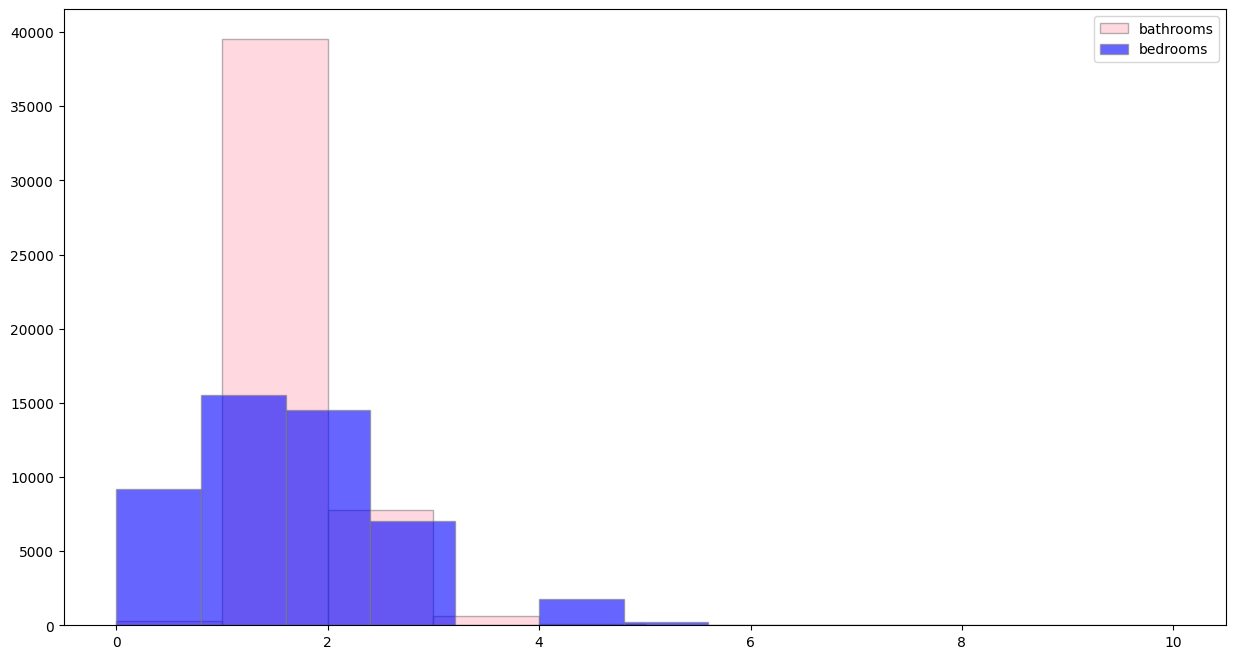

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(
    df['bathrooms'].tolist(),
    bins=10,
    color='pink',
    label='bathrooms',
    alpha=0.6,
    edgecolor='grey'
)

ax.hist(
    df['bedrooms'].tolist(),
    bins=10,
    color='blue',
    label='bedrooms',
    alpha=0.6, 
    edgecolor='grey'

)
plt.legend(loc='best')


Выбросов нет, данные в пределах нормы 

#### Complex analysis


In [27]:
corr_matrix=df_filtered.corr(numeric_only=True)
corr_matrix

,bathrooms,bedrooms,price,interest_level_encoded
bathrooms,1.000000,0.517200,0.670808,-0.062819
bedrooms,0.517200,1.000000,0.547310,0.051282
price,0.670808,0.547310,1.000000,-0.199652
interest_level_encoded,-0.062819,0.051282,-0.199652,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

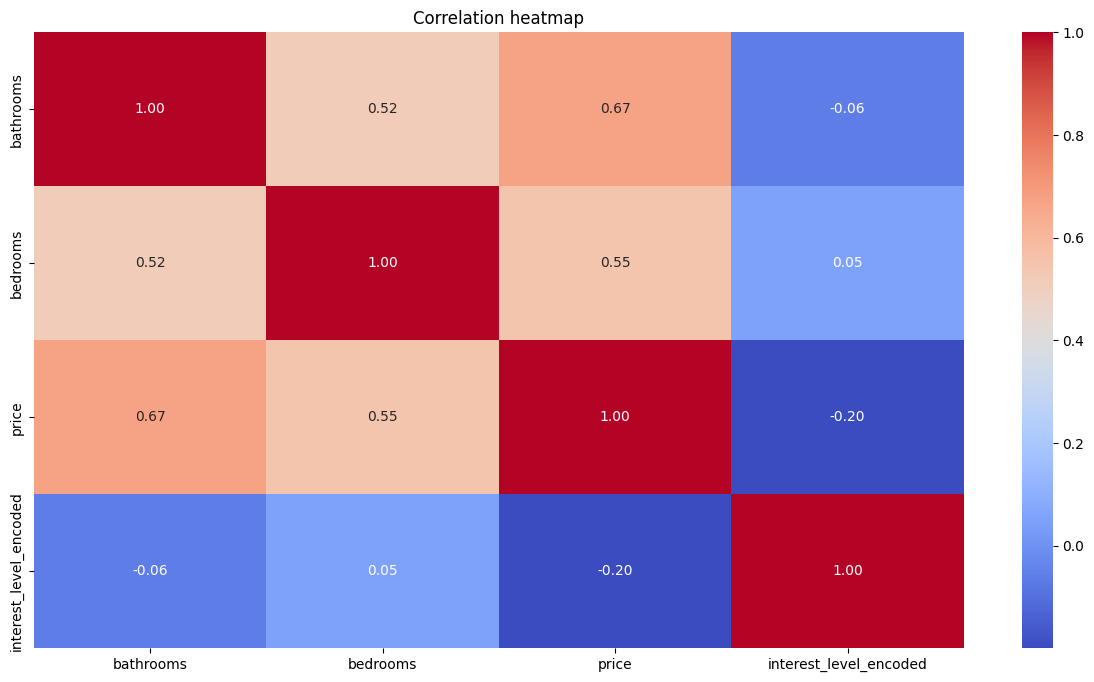

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)
plt.title('Correlation heatmap')

The maximum correlation is between price and amount of bathrooms

<Axes: xlabel='price', ylabel='bathrooms'>

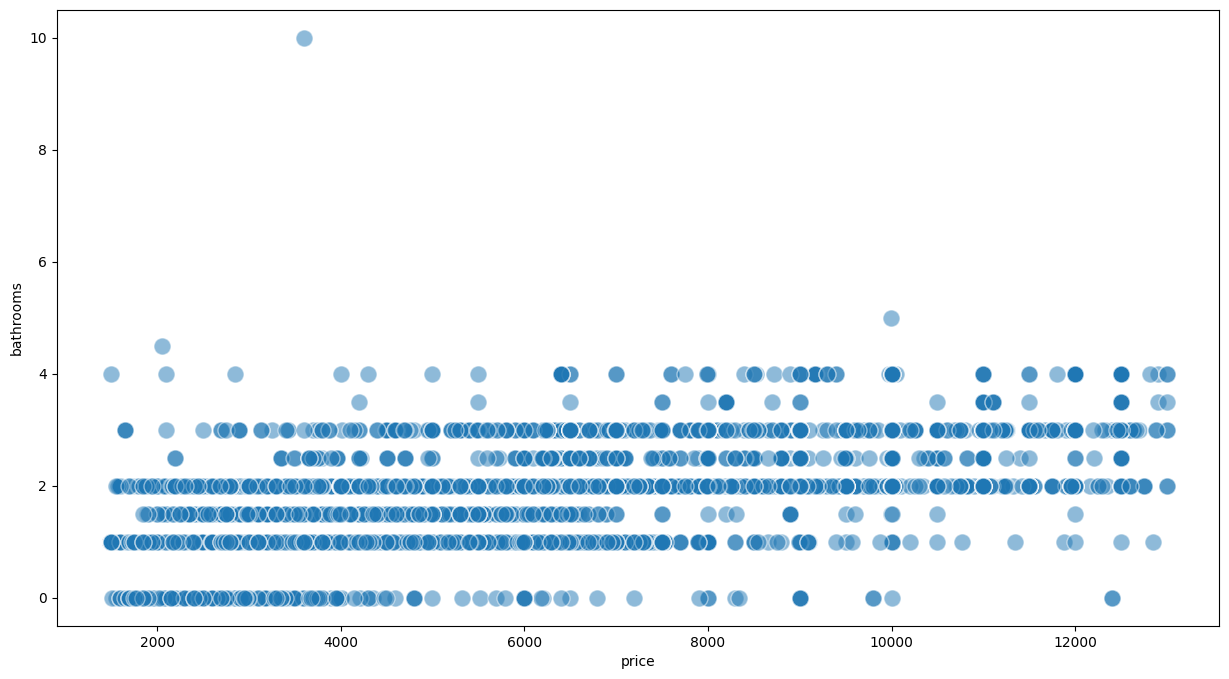

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['price'], y=df['bathrooms'], s=150, alpha=0.5)

<Axes: xlabel='price', ylabel='bedrooms'>

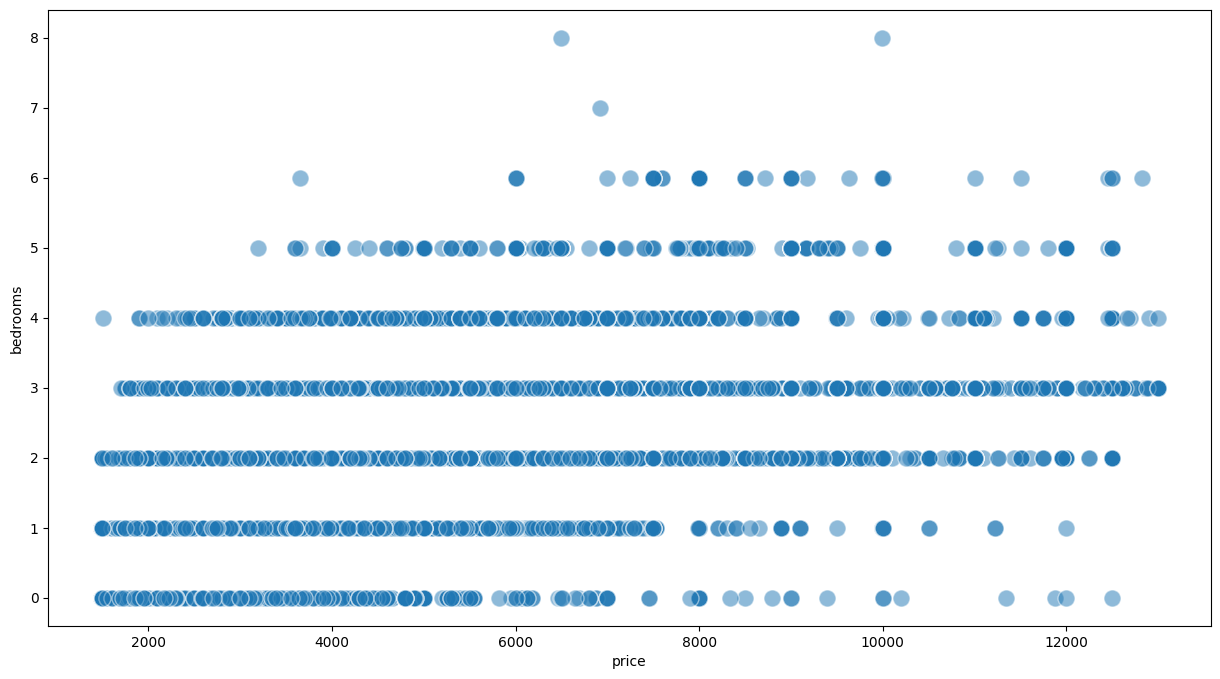

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='price', y='bedrooms', data=df, s=150, alpha=0.5)

<Axes: xlabel='price', ylabel='interest_level_encoded'>

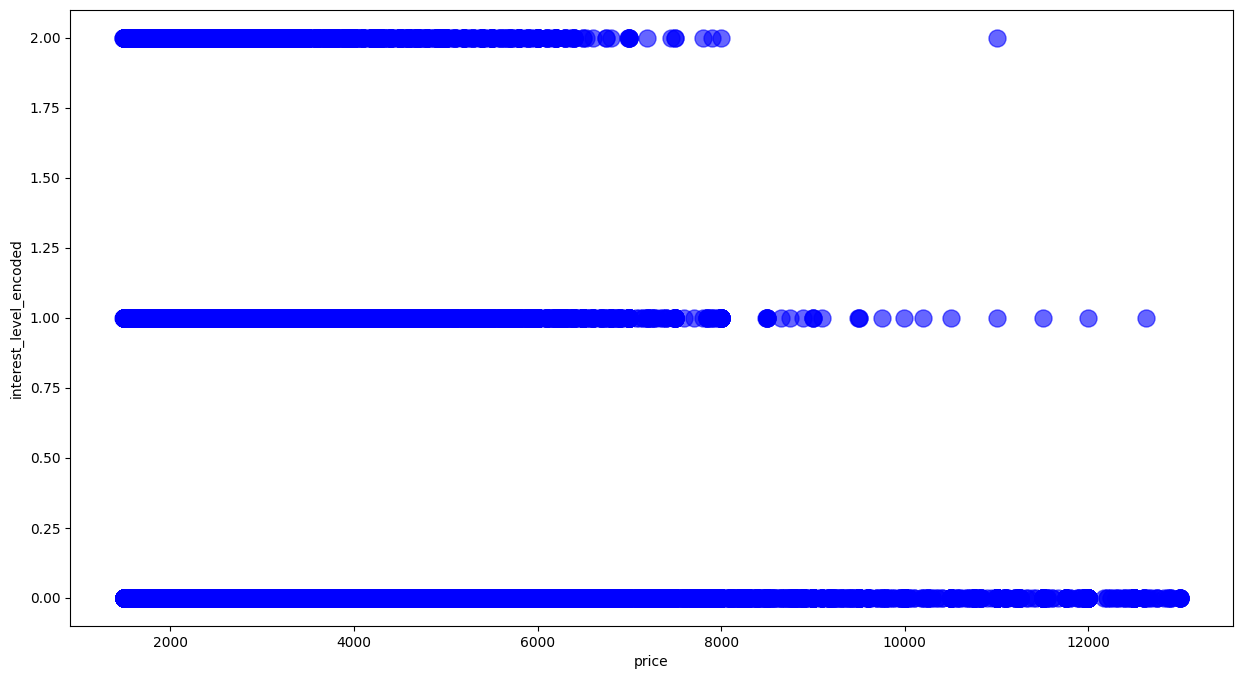

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='price', y='interest_level_encoded', data=df, s=150, alpha=0.6, color = 'blue', edgecolor='blue')

## Creating features


In [32]:
df['bathroom_squared']=df['bathrooms']**2
df['bedroom_squared']=df['bedrooms']**2
df['interest_level_squared']=df['interest_level_encoded']**2
df.head(5)

,bathrooms,bedrooms,interest_level,price,interest_level_encoded,bathroom_squared,bedroom_squared,interest_level_squared
0,1.0,1,medium,2400,1,1.00,1,1
1,1.0,2,low,3800,0,1.00,4,0
2,1.0,2,medium,3495,1,1.00,4,1
3,1.5,3,medium,3000,1,2.25,9,1
4,1.0,0,low,2795,0,1.00,0,0


In [33]:
cols=['bathroom_squared', 'bedroom_squared', 'interest_level_squared', 'price']
corr_matrix_2=df[cols].corr(numeric_only=True)
corr_matrix_2

,bathroom_squared,bedroom_squared,interest_level_squared,price
bathroom_squared,1.000000,0.521951,-0.061563,0.646949
bedroom_squared,0.521951,1.000000,0.036408,0.544612
interest_level_squared,-0.061563,0.036408,1.000000,-0.182283
price,0.646949,0.544612,-0.182283,1.000000


In [34]:
corr_matrix

,bathrooms,bedrooms,price,interest_level_encoded
bathrooms,1.000000,0.517200,0.670808,-0.062819
bedrooms,0.517200,1.000000,0.547310,0.051282
price,0.670808,0.547310,1.000000,-0.199652
interest_level_encoded,-0.062819,0.051282,-0.199652,1.000000


#### We can see that's correlation hasn't changed

In [35]:
data_poly=pd.read_json("data/train.json")
data_poly=data_poly[['bedrooms', 'bathrooms', 'interest_level', 'price']].reset_index(drop=True)
data_poly.head()


,bedrooms,bathrooms,interest_level,price
0,1,1.0,medium,2400
1,2,1.0,low,3800
2,2,1.0,medium,3495
3,3,1.5,medium,3000
4,0,1.0,low,2795


In [36]:
encoder_2=OrdinalEncoder(categories=[['low', 'medium', 'high']])
data_poly['interest_level_encoded']=encoder.fit_transform(data_poly[['interest_level']]).astype(int)
data_poly.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                49352 non-null  int64  
 1   bathrooms               49352 non-null  float64
 2   interest_level          49352 non-null  object 
 3   price                   49352 non-null  int64  
 4   interest_level_encoded  49352 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


In [37]:
q_1_poly=data_poly['price'].quantile(q=0.01)
q_99_poly=data_poly['price'].quantile(q=0.99)
data_poly_filtred=data_poly[(data_poly['price']>q_1_poly) & (data_poly['price']<q_99_poly)].reset_index(drop=True)
data_poly_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48343 entries, 0 to 48342
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                48343 non-null  int64  
 1   bathrooms               48343 non-null  float64
 2   interest_level          48343 non-null  object 
 3   price                   48343 non-null  int64  
 4   interest_level_encoded  48343 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [38]:
df_poly=data_poly_filtred[['bedrooms', 'bathrooms', 'interest_level_encoded', 'price']]
df_poly.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48343 entries, 0 to 48342
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedrooms                48343 non-null  int64  
 1   bathrooms               48343 non-null  float64
 2   interest_level_encoded  48343 non-null  int64  
 3   price                   48343 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [39]:
X_poly=df_poly.loc[:, df_poly.columns!='price']
Y_poly=df_poly['price']

In [40]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly=train_test_split(X_poly, Y_poly, test_size=0.2, random_state=21)

In [41]:
poly=PolynomialFeatures(degree=10, include_bias=False)
X_train_poly=poly.fit_transform(X_train_poly)
X_test_poly=poly.transform(X_test_poly)


### Train and compare models



#### Linear Regression

In [42]:
result_MAE=pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE=pd.DataFrame(columns=['model', 'train', 'test'])

In [43]:
linear_model=LinearRegression()
linear_model.fit(X_train_poly, y_train_poly)
predict_lin_train=linear_model.predict(X_train_poly)
predict_lin_test=linear_model.predict(X_test_poly)



In [44]:
mae_lin_train=mean_absolute_error(y_train_poly, predict_lin_train)
mae_lin_test=mean_absolute_error(y_test_poly, predict_lin_test)

rmse_lin_train=np.sqrt(mean_squared_error(y_train_poly, predict_lin_train))
rmse_lin_test=np.sqrt(mean_squared_error(y_test_poly, predict_lin_test))

In [45]:
print("MAE comparison on train test data")
print(f"train {mae_lin_train:.2f} VS test {mae_lin_test:.2f}")

MAE comparison on train test data
train 718.83 VS test 1249.73


Похоже, что модель переобучилась( вероятно из за высокой степени в полиномиальный фичах)

In [46]:
result_MAE.loc[len(result_MAE)]=['linear_regression', mae_lin_train,mae_lin_test]
result_RMSE.loc[len(result_RMSE)]=['linear_regression', rmse_lin_train, rmse_lin_test]

#### Decision Tree



In [47]:
decision_tree_model=DecisionTreeRegressor(max_depth=5,min_samples_split=5,random_state=21)
decision_tree_model.fit(X_train_poly, y_train_poly)


,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [48]:
dec_tree_train_prediction=decision_tree_model.predict(X_train_poly)
dec_tree_test_prediction=decision_tree_model.predict(X_test_poly)

In [49]:
mae_tree_train=mean_absolute_error(y_train_poly, dec_tree_train_prediction)
mae_tree_test=mean_absolute_error(y_test_poly, dec_tree_test_prediction)

rmse_tree_train=np.sqrt(mean_squared_error(y_train_poly, dec_tree_train_prediction))
rmse_tree_test=np.sqrt(mean_squared_error(y_test_poly, dec_tree_test_prediction))


In [50]:
print("MAE comparison on train test data")
print(f"train {mae_tree_train:.2f} VS test {mae_tree_test:.2f}")

MAE comparison on train test data
train 724.93 VS test 730.55


Заметим, что тут нет такого разрыва как в линейно регрессии (модель хорошо отработала и на тренировочных, и на тестовых данных)

In [51]:
result_MAE.loc[len(result_MAE)]=['decision_tree', mae_tree_train, mae_tree_test]
result_RMSE.loc[len(result_RMSE)]=['decision_tree', rmse_tree_train, rmse_tree_test]

#### Naive Model


In [52]:
mean_train=round(y_train_poly.mean(),5)
mean_test=round(y_test_poly.mean(),5)

In [53]:
median_train = y_train_poly.median()
median_test = y_test_poly.median()
print(f"Mean of train {mean_train} and mediana {median_train}")
print(f"Mean of test {mean_test} and mediana {median_test}")

Mean of train 3535.82378 and mediana 3150.0
Mean of test 3532.54111 and mediana 3147.0


In [54]:
y_pred_mean_train=[mean_train]*len(y_train_poly)
y_pred_mean_test=[mean_test]*len(y_test_poly)

y_pred_median_train=[median_train]*len(y_train_poly)
y_pred_median_test=[median_test]*len(y_test_poly)

In [55]:
mae_navi_train_mean=mean_absolute_error(y_train_poly, y_pred_mean_train)
mae_navi_test_mean=mean_absolute_error(y_test_poly, y_pred_mean_test)

rmse_navi_train_mean=np.sqrt(mean_squared_error(y_train_poly, y_pred_mean_train))
rmse_navi_test_mean=np.sqrt(mean_squared_error(y_test_poly, y_pred_mean_test))


In [56]:
mae_navi_train_median=mean_absolute_error(y_train_poly, y_pred_median_train)
mae_navi_test_mediann=mean_absolute_error(y_test_poly, y_pred_median_test)

rmse_navi_train_median=np.sqrt(mean_squared_error(y_train_poly, y_pred_median_train))
rmse_navi_test_median=np.sqrt(mean_squared_error(y_test_poly, y_pred_median_test))


In [57]:
result_MAE.loc[len(result_MAE)]=['naive_mean',mae_navi_train_mean, mae_navi_test_mean]
result_RMSE.loc[len(result_RMSE)]=['naive_mean', rmse_navi_train_mean, rmse_navi_test_mean]

In [58]:
result_MAE.loc[len(result_MAE)]=['naive_mean',mae_navi_train_median, mae_navi_test_mediann]
result_RMSE.loc[len(result_RMSE)]=['naive_mean', rmse_navi_train_median, rmse_navi_test_median]

#### Compare the results of MAE and RMSE tables

In [59]:
result_MAE


,model,train,test
0,linear_regression,718.833480,1249.727278
1,decision_tree,724.926114,730.550604
2,naive_mean,1131.815442,1144.533690
3,naive_mean,1079.734162,1092.166408


In [60]:
result_RMSE

,model,train,test
0,linear_regression,1025.592951,51089.648592
1,decision_tree,1032.151502,1035.724768
2,naive_mean,1580.460676,1606.034024
3,naive_mean,1626.873056,1651.661962


Очевидно, что дерево решений среди этих моделей будет наилучшей, тк оно менее склонно к переобучению чем линейная модель и менее наивная чем третья